In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv('My project/netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.shape

(8790, 10)

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
data = data.dropna(subset=["title", "director", "country", "date_added"])  

In [12]:
data["rating"].fillna("Not Rated", inplace=True)
data["duration"].fillna("Unknown", inplace=True)

C:\Users\sai\AppData\Local\Temp\ipykernel_11292\1391992597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["rating"].fillna("Not Rated", inplace=True)
C:\Users\sai\AppData\Local\Temp\ipykernel_11292\1391992597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [14]:
data.duplicated().sum()       
data.drop_duplicates(inplace=True)

In [15]:
data["date_added"] = pd.to_datetime(data["date_added"])
data["year_added"] = data["date_added"].dt.year
data["month_added"] = data["date_added"].dt.month

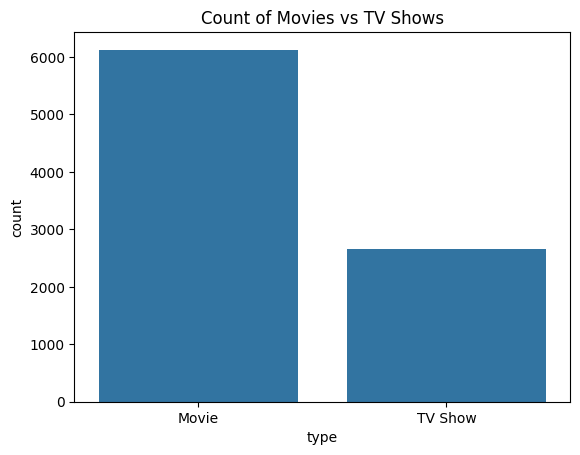

In [17]:
sns.countplot(data=data, x="type")
plt.title("Count of Movies vs TV Shows")
plt.show()

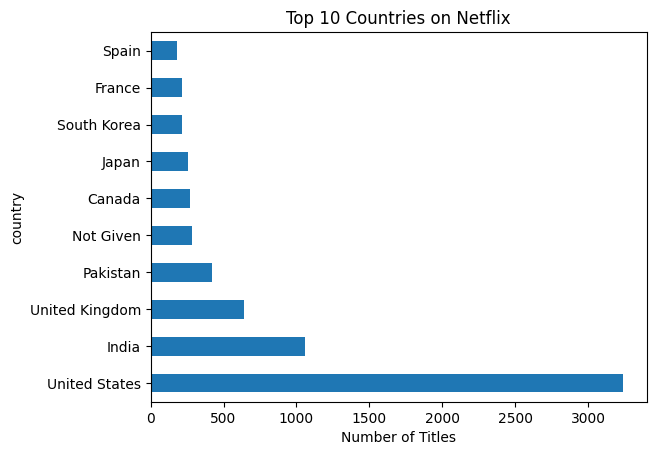

In [18]:
data["country"].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Number of Titles")
plt.show()

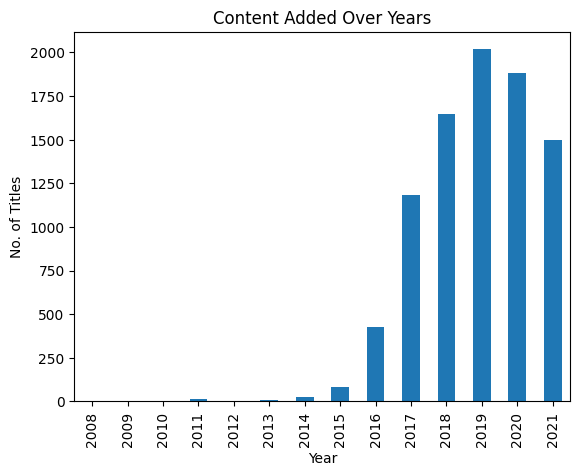

In [19]:
data["year_added"].value_counts().sort_index().plot(kind='bar')
plt.title("Content Added Over Years")
plt.ylabel("No. of Titles")
plt.xlabel("Year")
plt.show()

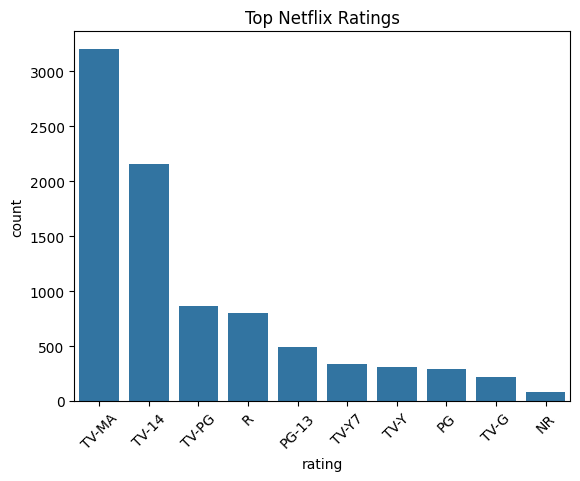

In [21]:
sns.countplot(data=data, x="rating", order=data["rating"].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Top Netflix Ratings")
plt.show()

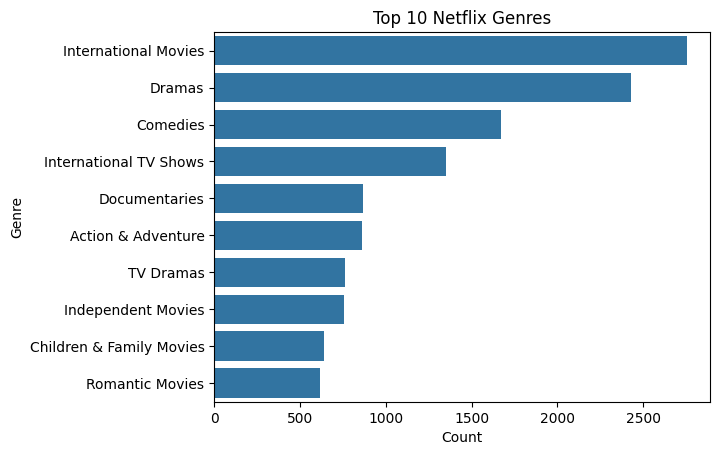

In [22]:
from collections import Counter

genres = []
for i in data["listed_in"]:
    for genre in i.split(","):
        genres.append(genre.strip())

genre_counts = Counter(genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=["Genre", "Count"])

sns.barplot(data=top_genres, x="Count", y="Genre")
plt.title("Top 10 Netflix Genres")
plt.show()

In [23]:
data.to_csv("netflix_cleaned.csv", index=False)